In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re

In [30]:
df_tree = pd.read_csv("testing/tree/tree_3mf.result", delimiter='&', index_col=False)
df_tree.columns = df_tree.columns.map(str.strip)
df_tree['Month'] = df_tree['Name'].map(lambda s: ''.join(re.findall('[A-Z]+',s)))
df_tree['pruned'] = df_tree.index % 2 != 0
df_tree['Method'] = 'FDT'
df_tree = df_tree[['Month', 'PI', 'CI', 'maxE', 'nR', 'pruned', 'Method']]

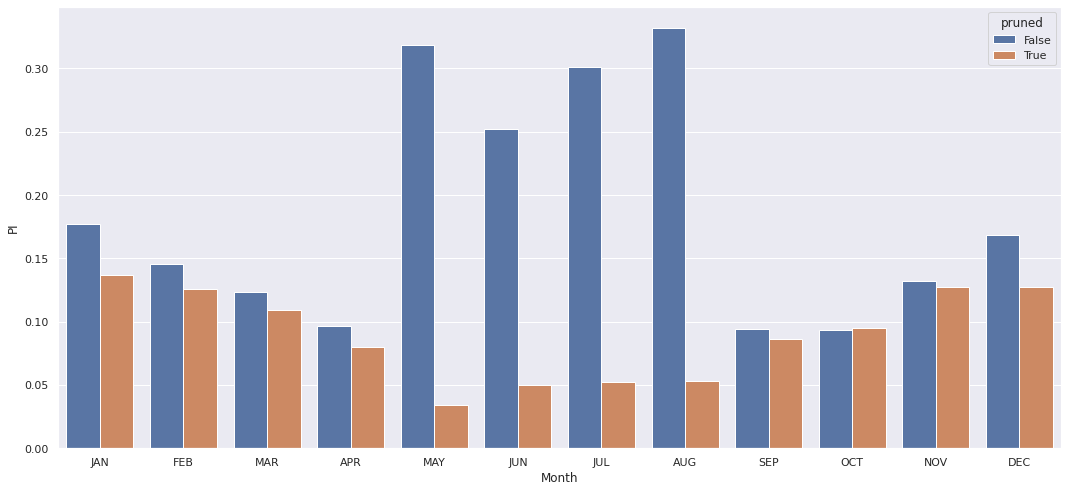

In [32]:
sns.set(rc={'figure.figsize':(15, 7)})
ax = sns.barplot(x = "Month", y = "PI", hue = "pruned", data = df_tree)

figure = ax.get_figure()   
figure.tight_layout()
figure.savefig('barplot_PI_fuzzydecisiontree.png', dpi=400)

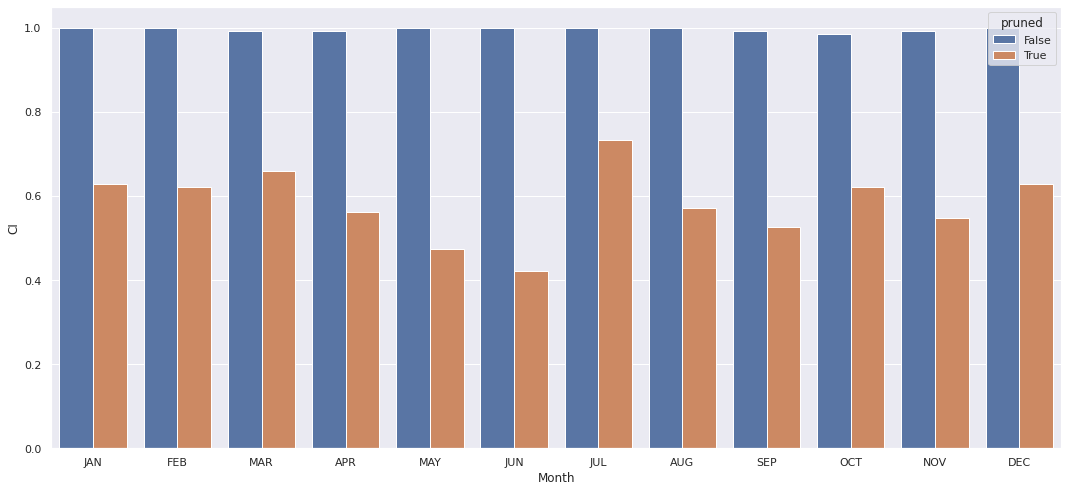

In [33]:
sns.set(rc={'figure.figsize':(15, 7)})
ax = sns.barplot(x = "Month", y = "CI", hue = "pruned", data = df_tree)

figure = ax.get_figure()   
figure.tight_layout()
figure.savefig('barplot_CI_fuzzydecisiontree.png', dpi=400)

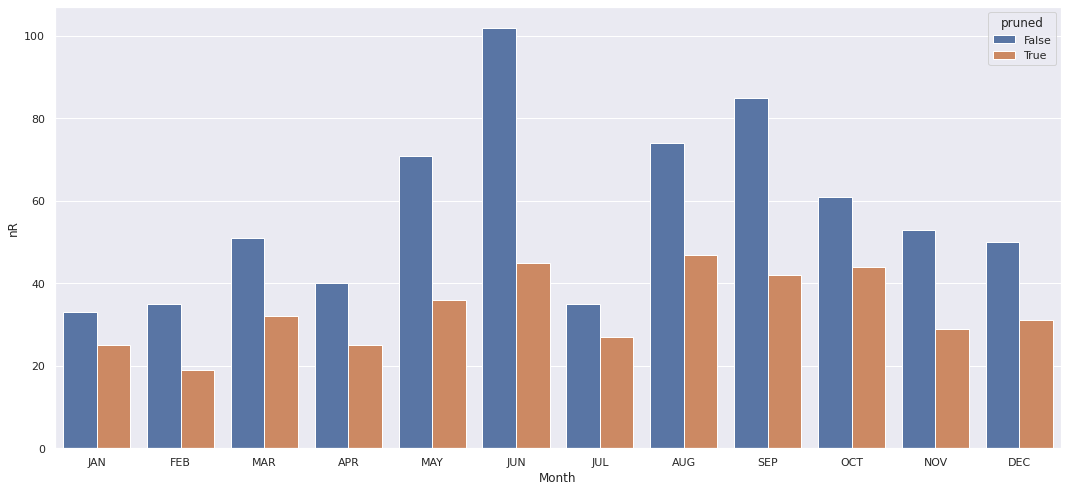

In [35]:
sns.set(rc={'figure.figsize':(15, 7)})
ax = sns.barplot(x = "Month", y = "nR", hue = "pruned", data = df_tree)

figure = ax.get_figure()   
figure.tight_layout()
figure.savefig('barplot_nR_fuzzydecisiontree.png', dpi=400)

In [36]:
df_fpa = pd.read_csv("testing/fpa/fpa_3mf.result", delimiter='&')
df_fpa.columns = df_fpa.columns.map(str.strip)
df_fpa['Method'] = 'FPA'
df_fpa['Month'] = df_fpa['Name'].map(lambda s: ''.join(re.findall('[A-Z]+',s)))
df_fpa = df_fpa[['Month', 'PI', 'CI', 'maxE', 'nR', 'Method']]

df_wm = pd.read_csv("testing/wm/wm_3mf.result", delimiter='&')
df_wm.columns = df_wm.columns.map(str.strip)
df_wm['Method'] = 'W&M'
df_wm['Month'] = df_wm['Name'].map(lambda s: ''.join(re.findall('[A-Z]+',s)))
df_wm = df_wm[['Month', 'PI', 'CI', 'maxE', 'nR', 'Method']]

df_ols = pd.read_csv("testing/ols/ols.result", delimiter='&')
df_ols.columns = df_ols.columns.map(str.strip)
df_ols['Method'] = 'OLS'
df_ols['Month'] = df_ols['Name'].map(lambda s: ''.join(re.findall('[A-Z]+',s)))
df_ols = df_ols[['Month', 'PI', 'CI', 'maxE', 'nR', 'Method']]

df_hfp = pd.read_csv("testing/hfp/hfp_3mf_best.result", delimiter='&')
df_hfp.columns = df_hfp.columns.map(str.strip)
df_hfp['Method'] = 'HFP'
df_hfp['Month'] = df_hfp['Name'].map(lambda s: ''.join(re.findall('[A-Z]+',s)))
df_hfp = df_hfp[['Month', 'PI', 'CI', 'maxE', 'nR', 'Method']]

In [37]:
df = df_fpa.append(df_ols).append(df_wm).append(df_hfp).append(df_tree.loc[df_tree['pruned'] == True])

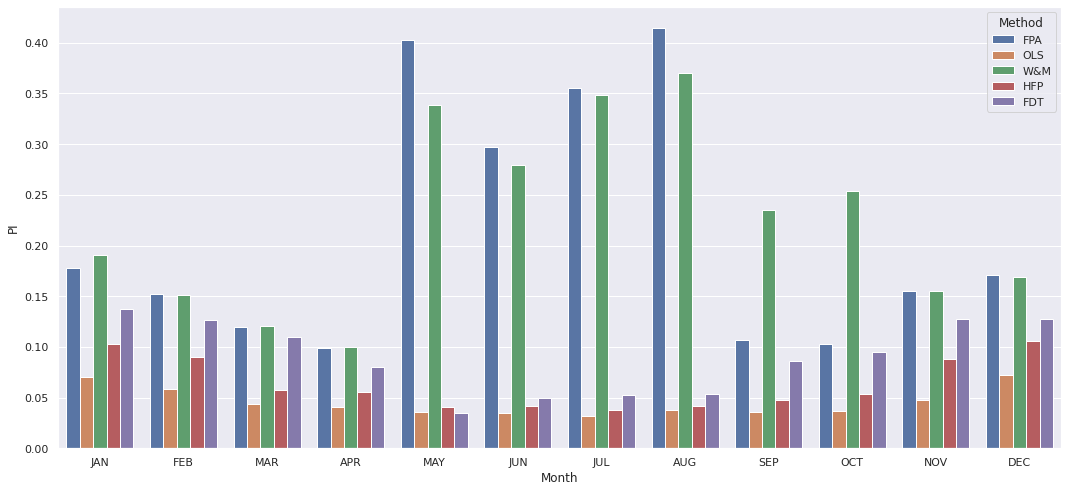

In [38]:
sns.set(rc={'figure.figsize':(15, 7)})
ax = sns.barplot(x = "Month", y = "PI", hue = "Method", data = df)

figure = ax.get_figure()   
figure.tight_layout()
figure.savefig('barplot_PI_fpa-ols-wm-hfp-fdt.png', dpi=400)

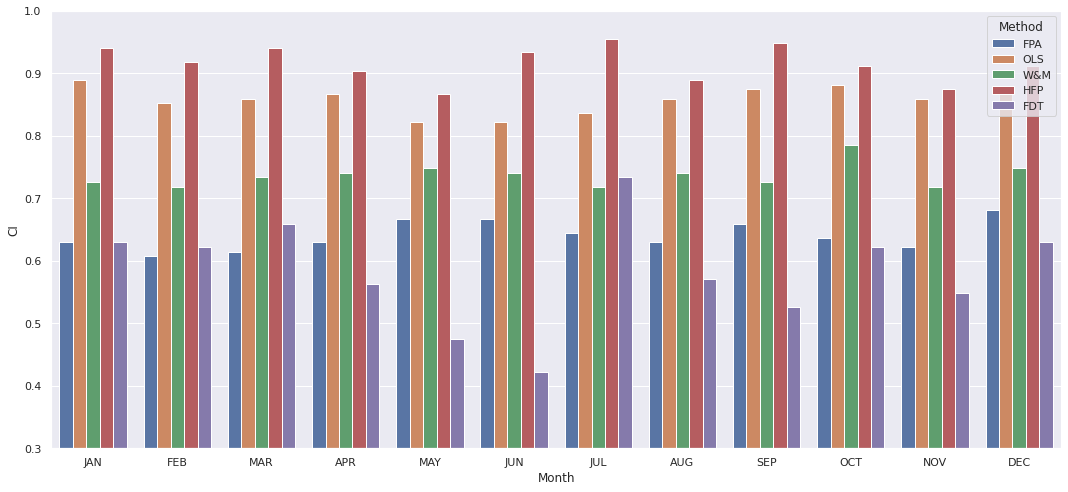

In [39]:
sns.set(rc={'figure.figsize':(15, 7)})
ax = sns.barplot(x = "Month", y = "CI", hue = "Method", data = df)
ax.set(ylim=(0.3, 1))

figure = ax.get_figure()   
figure.tight_layout()
figure.savefig('barplot_CI_fpa-ols-wm-hfp-fdt.png', dpi=400)

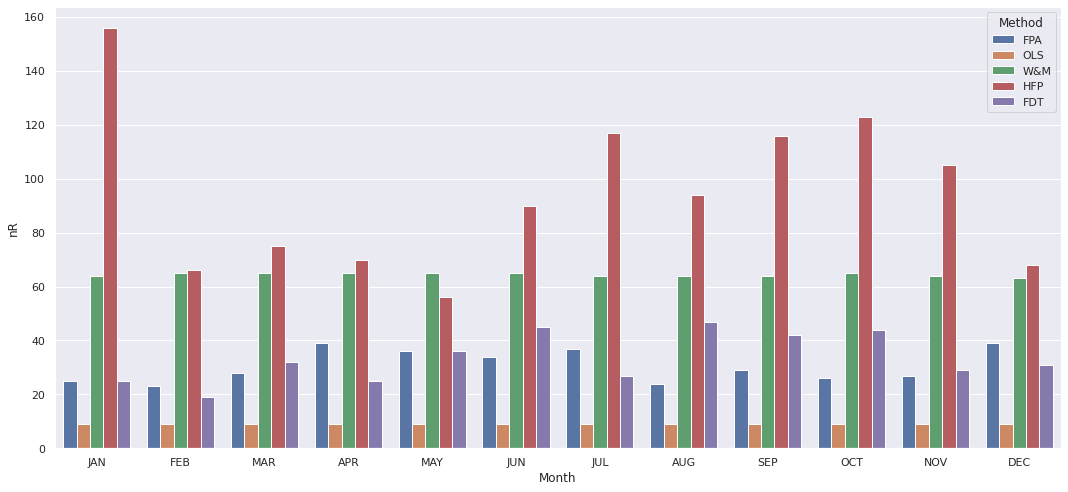

In [41]:
sns.set(rc={'figure.figsize':(15, 7)})
ax = sns.barplot(x = "Month", y = "nR", hue = "Method", data = df)
#ax.set(ylim=(0.3, 1))

figure = ax.get_figure()   
figure.tight_layout()
figure.savefig('barplot_nR_fpa-ols-wm-hfp-fdt.png', dpi=400)